<a href="https://colab.research.google.com/github/safranco8/entregables-grupo-31/blob/main/introML/IntroML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
#010 Importamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
#020 Cargamos el conjunto de datos The Boston housing y vemos su contenido.
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
#030 Exploramos el dataset

#print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']      # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

for key in boston.keys():
  print("===============")
  print("===", key, "===")
  print("===============")
  print(boston[key])


=== data ===
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
=== target ===
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 

In [ ]:
#31 Exploramos el dataset, foco en las variables 'feature_names'

print(boston['data'].shape)

"""for variable in boston['feature_names']:
  print("===============")
  print("=== feature-names = ", variable, "===")
  print("===============")
  print(variable.mean())
"""

(506, 13)


'for variable in boston[\'feature_names\']:\n  print("===============")\n  print("=== feature-names = ", variable, "===")\n  print("===============")\n  print(variable.mean())\n'

In [ ]:
#040 dimensiones de las matrices 
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [ ]:
#050 Creamos los atibutos (descripcion) de las variables de 'data' para usar en tablas

attributes = {}

attributes["CRIM"]    ="per capita crime rate by town"
attributes["ZN"]      ="proportion of residential land zoned for lots over 25,000 sq.ft."
attributes["INDUS"]   ="proportion of non-retail business acres per town"
attributes["CHAS"]    ="Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)"
attributes["NOX"]     ="nitric oxides concentration (parts per 10 million)"
attributes["RM"]      ="average number of rooms per dwelling"
attributes["AGE"]     ="proportion of owner-occupied units built prior to 1940"
attributes["DIS"]     ="weighted distances to five Boston employment centres"
attributes["RAD"]     ="index of accessibility to radial highways"
attributes["TAX"]     ="full-value property-tax rate per $10,000"
attributes["PTRATIO"] ="pupil-teacher ratio by town"
attributes["B"]       ="1000(Bk - 0.63)^2 where Bk is the proportion of black people by town"
attributes["LSTAT"]   ="% lower status of the population"
attributes["MEDV"]    ="Median value of owner-occupied homes in $1000's"

for key in attributes:
  print(key, "->", attributes[key])

CRIM -> per capita crime rate by town
ZN -> proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS -> proportion of non-retail business acres per town
CHAS -> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX -> nitric oxides concentration (parts per 10 million)
RM -> average number of rooms per dwelling
AGE -> proportion of owner-occupied units built prior to 1940
DIS -> weighted distances to five Boston employment centres
RAD -> index of accessibility to radial highways
TAX -> full-value property-tax rate per $10,000
PTRATIO -> pupil-teacher ratio by town
B -> 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
LSTAT -> % lower status of the population
MEDV -> Median value of owner-occupied homes in $1000's


In [ ]:
#060 Obtengo "columnas" del arreglo numpy (para trabajarlas mejor)
#NOTA: salen de la matriz transpuesta

columns = {}

columns["CRIM"], columns["ZN"], columns["INDUS"], \
columns["CHAS"], columns["NOX,"], columns["RM"], \
columns["AGE"], columns["DIS"], columns["RAD"], \
columns["TAX"], columns["PTRATIO"], columns["B"], \
columns["LSTAT"] = boston['data'].T


In [ ]:
#070 grafico cada "columna" de informacion

#for column, attribute in zip(columns, attributes):
#  plt.figure(figsize=(10, 5))
#  plt.scatter(columns[column], boston['target'], facecolor="dodgerblue", edgecolor="k", label="datos")
#  plt.title(attribute +" --- " +attributes[attribute])
#  plt.show()

#  plt.figure(figsize=(10, 1))
#  plt.boxplot(columns[column], vert=False)
#  plt.title(attribute +" --- " +attributes[attribute])
#  plt.show()



## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
#070 Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

#**Respuestas**

**1.1 ¿De qué se trata el conjunto de datos?**

El conjunto de datos se trata del precio de las viviendas de la ciudad de Boston de la década de 1970's con sus características principales.


**1.2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

La variable objetivo a predecir es el **precio** de las viviendas. El significado que tiene es ver como se ve afectado dicho precio en relación con el cambio de las demás características del dataset.

**1.3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**


Se cuentan con los siguientes atributos:

Cuenta con 506 datos de precios de casas con 13 carateristicas correspondiente a cada casa. 

Las caracteristicas son varables algunas numericas y otras categoricas.El valor medio (atributo 14) es el dato a predecir.

* **CRIM:**	tasa de criminalidad per cápita por ciudad
* **ZN:**	Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
* **INDUS:**	Proporción de acres comerciales no minoristas (industrias) por ciudad
* **CHAS:**	Charles River variable ficticia (= 1 si el tramo limita con el río; 0 en caso contrario)
* **NOX:**	Concentración de óxidos nítricos (partes por 10 millones)
* **RM:**	promedio de cuartos por vivienda
* **AGE:**	proporción de unidades ocupadas por propietarios construidas antes de 1940
* **DIS:**	Distancias ponderadas a cinco centros de empleo de Boston
* **RAD:**	Índice de accesibilidad a carreteras radiales
* **TAX:**	Tasa de impuesto a la propiedad de valor total por cada $10,000

* **PTRATIO:**	ratio alumno-profesor por localidad
* **B:**	1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
* **LSTAT:**	% estado inferior de la población
* **MEDV:**	Valor medio de las viviendas ocupadas por sus propietarios en $1000's de dólares



**1.4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

Entre los atributos que a primera impresión parecerían ser determinante, están:


*   **CRIM** índice de criminalidad 
*   **RAD** accesibilidad a carreteras
*   **INDUS** Proporción de industrias por ciudad
*   **LSTAT** % estado inferior de la población
*   **RM** promedio de cuartos por vivienda



**1.5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.** 

Se observa un dilema ético al tener en cuenta como variable relevante para predecir el precio de una propiedad a la cantidad de población negra por ciudad. 
Pensamos que el conjunto de datos en general se puede utilizar, pero sin tener en cuenta estas variables con sesgos, ya que en la actualidad no deberían influir en el valor de las viviendas en una ciudad.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

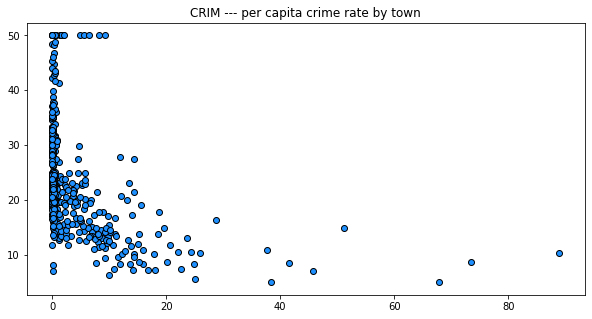

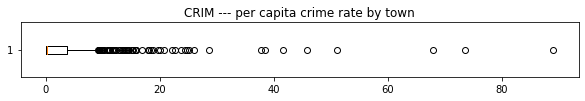

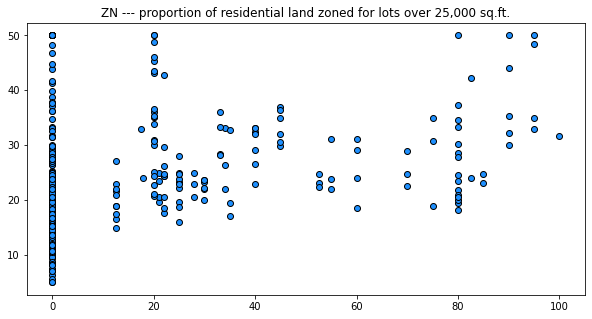

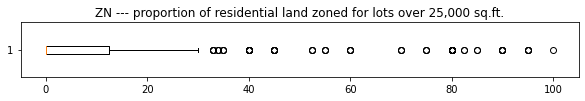

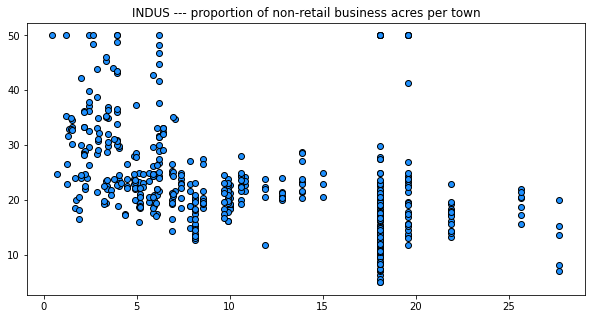

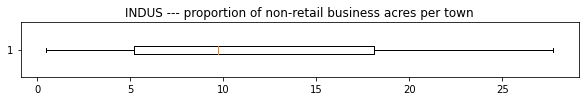

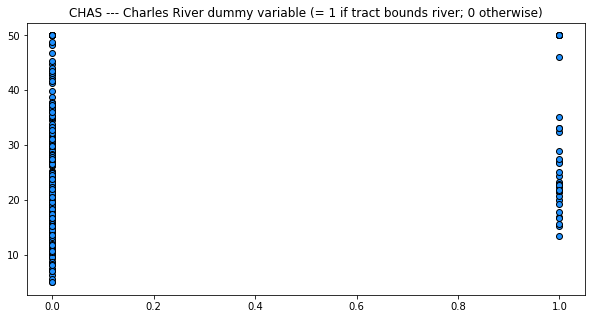

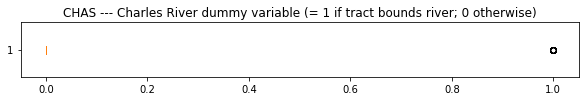

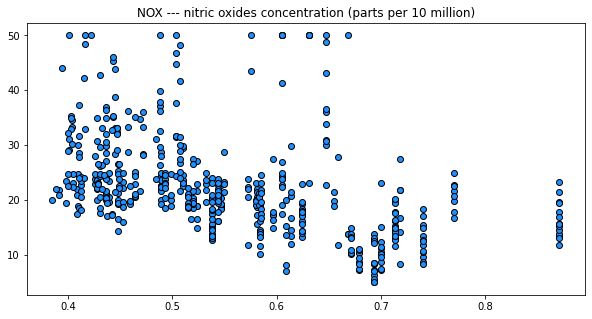

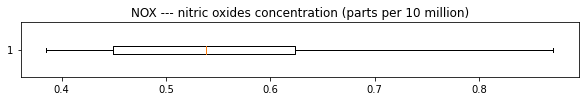

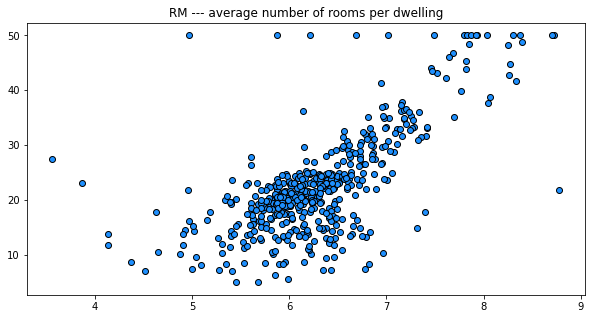

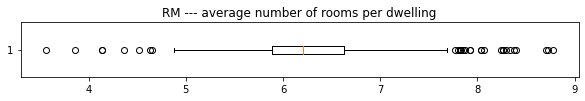

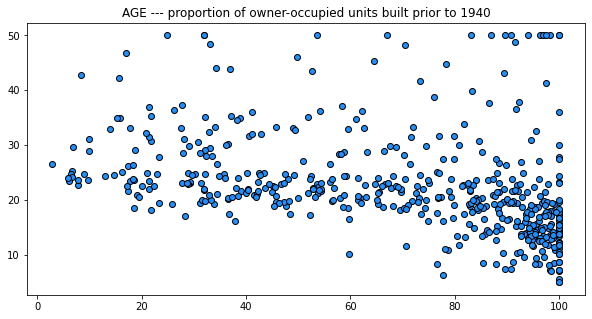

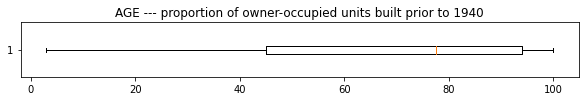

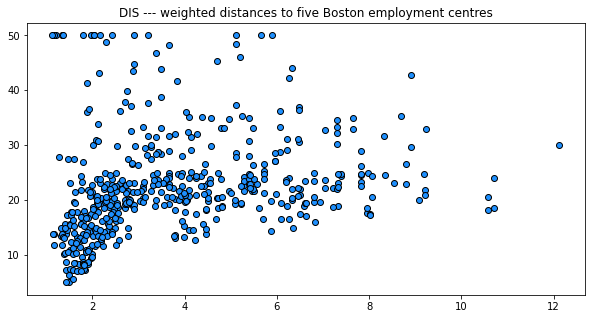

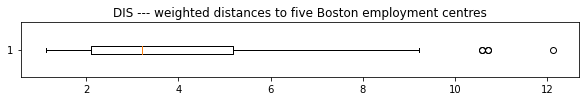

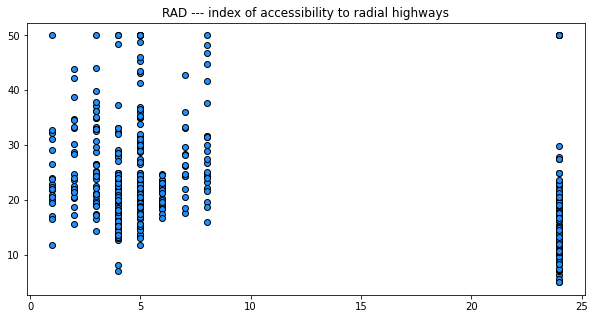

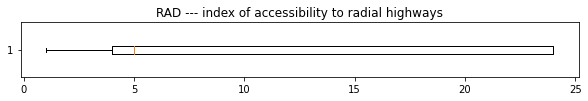

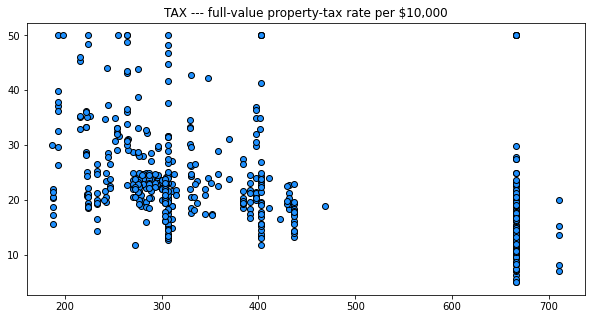

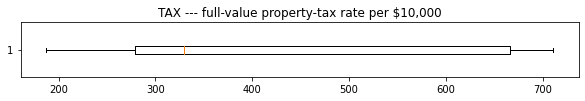

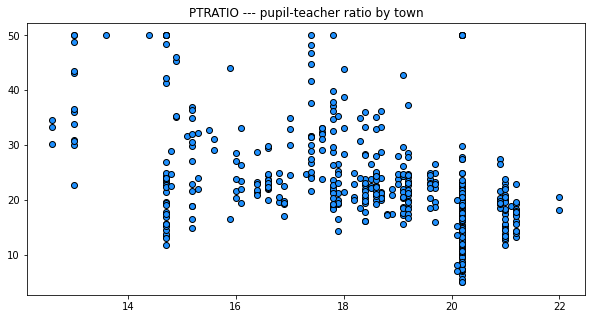

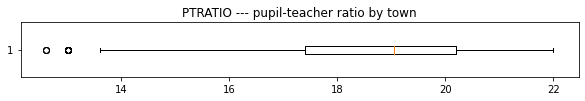

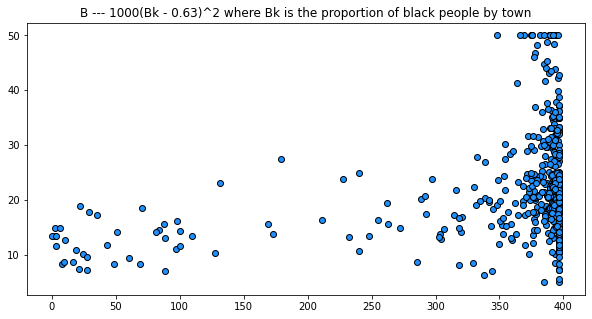

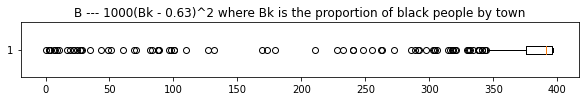

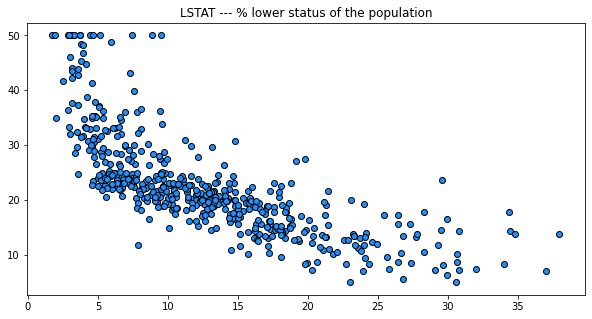

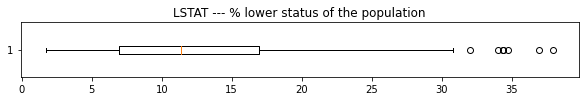

In [ ]:
#Ejercicio 2.1

#080 grafico cada "columna" de informacion

for column, attribute in zip(columns, attributes):
  plt.figure(figsize=(10, 5))
  plt.scatter(columns[column], boston['target'], facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.title(attribute +" --- " +attributes[attribute])
  plt.show()

  plt.figure(figsize=(10, 1))
  plt.boxplot(columns[column], vert=False)
  plt.title(attribute +" --- " +attributes[attribute])
  plt.show()




#060 Se grafican cada atributo vs MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $1000's de dólares
#------------------------------------------------------------------------------------

#fig, ejes = plt.subplots(1, sharex=True)
#ejes.set(ylabel='Price')
#feature = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
#for selector in range(12) :
#  plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label='MEDV')
#  plt.title(feature [selector])
#  ejes.set_ylabel('MEDV')
#  plt.show()
 

##-----------------------------------------------------------------------------------------------------
#feature = 'CRIM'
#selector = (boston['feature_names'] == feature)
#plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
#plt.title(feature)
#plt.show()

**Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.**

**Respuesta del ejercicio 2.3** 

Los atributos por orden de importancia para la predicción del precio son:


Los atributos que a simple vista son los más informativos para la predicción del precio son:

* **LSTAT** % estado inferior de la población
* **DIS** Distancias ponderadas a cinco centros de empleo de Boston
* **RM** promedio de cuartos por vivienda
* **CRIM** índice de criminalidad
* **AGE** proporción de unidades ocupadas por propietarios construidas antes de 1940


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
#300 1.Seleccione un solo atributo que considere puede ser el más apropiado.
# seleccionó el atributo 'RM'
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

#Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación de la variable RM

X_RM = boston['data'][:,5]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_RM, y, train_size=0.8, random_state=0) 
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((404,), (102,), (404,), (102,))

In [ ]:
#310  2.  Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.
#Instanciar y entrenar acá.
#le damos los datos sw x e y y nos devuelve la estimación de minimos cuadrados

def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias 
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y)) #hace los productos escalares de los vectores (.dot) y luego le hace la inversa (linalg.pinv)  w∗=(X⊤X)−1X⊤y

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)
w = linear_least_squares(X_train_f, y_train_f)
w

array([  9.37638431, -36.47618963])

In [ ]:
#320 3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación
#Predecir y evaluar acá.
y_train_pred = f(X_train_f, w)
y_test_pred = f(X_test_f, w)
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


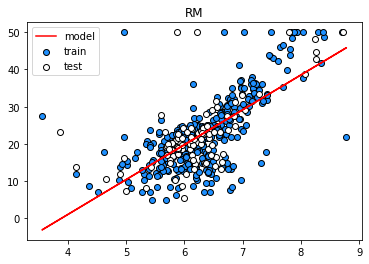

In [ ]:
#330 4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación
#Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.plot(X_train_f, f(X_train_f, w), color="red", label="model")


plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**3. Responder acá**

In [ ]:
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

In [ ]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
train_errors = []
val_errors = []
degrees = range(1,8)
for degree in degrees:
    # Entrenamiento:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # Predicciones:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)
    
    # Evaluacion:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

Min Test Error: 39.794731163726546
Train Error: 37.74552897028125


In [ ]:
print("Errores entrenamiento: ", train_errors) 
print("Errores test: ", val_errors)

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913214,
  33.131121571949116,
  33.13011641557084,
  33.06035876459896,
  33.06035722589541,
  32.8548843047318],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925676028065,
  41.038288578720795,
  41.0091769653148,
  42.394110713112596,
  42.39922618997137,
  46.039030275360616])

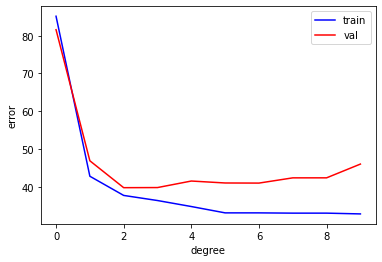

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Comienza a existir un sobreajuste a luego del polinomio de grado 2, ya que el error en el conjunto de entrenamiento continúa bajando pero en el conjunto de test el error comienza a crecer. Es decir, a partir del polinomio de grado 3, la regresión funciona mejor para los datos conocidos por el modelo pero no se ajusta a datos desconocidos.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

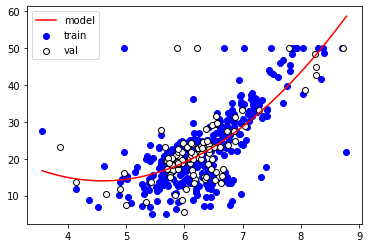

In [ ]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [ ]:
train_errors = []
val_errors = []
degrees = range(1,8)
for degree in degrees:
    # Entrenamiento:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # Predicciones:
    y_train_pred = model.predict(X_train_fs)
    y_val_pred = model.predict(X_test_fs)
    
    # Evaluacion:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

Min Test Error: 28.14497186312392
Train Error: 18.659453833139377


In [ ]:
print("Errores entrenamiento: ", train_errors) 
print("Errores test: ", val_errors)

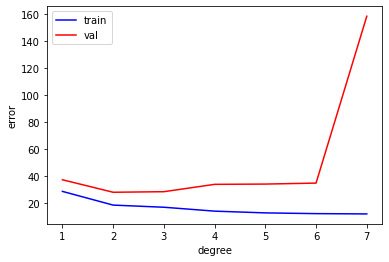

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Nuevamente podemos considerar que el sobreajuste comienza a luego del polinomio de grado 2, ya que el error para los datos de test comienza a aumentar

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
